# 1.Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls -al '/content/drive/MyDrive/Fastcampus_OpenCV/darknet'

total 12
drwx------ 2 root root 4096 Oct  3 12:40 cfg
drwx------ 2 root root 4096 Oct  3 12:29 data
drwx------ 2 root root 4096 Oct  3 12:27 weights


In [ ]:
weight_file = '/content/drive/MyDrive/Fastcampus_OpenCV/darknet/weights/yolov3.weights'
cfg_file = '/content/drive/MyDrive/Fastcampus_OpenCV/darknet/cfg/yolov3.cfg'
name_file = '/content/drive/MyDrive/Fastcampus_OpenCV/darknet/data/coco.names'

# 2.Load File

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
min_confidence = 0.5

In [ ]:
# Load Yolo
net = cv2.dnn.readNet(weight_file, cfg_file)

In [ ]:
classes = []
with open(name_file, 'r') as f:
    classes = [line.strip() for line in f.readlines()]

layer_names = net.getLayerNames()

In [ ]:
classes[:4]

['person', 'bicycle', 'car', 'motorbike']

In [ ]:
layer_names[:4]

('conv_0', 'bn_0', 'leaky_1', 'conv_1')

In [ ]:
# 반환된 값을 출력하여 확인합니다.
unconnected_layers = net.getUnconnectedOutLayers()
print("Unconnected Layers:", unconnected_layers)
output_layers = [layer_names[i - 1] for i in unconnected_layers]

Unconnected Layers: [200 227 254]


In [ ]:
output_layers

['yolo_82', 'yolo_94', 'yolo_106']

In [ ]:
from google.colab import files
files.upload()

{}

0 2 car
8 2 car
11 2 car
15 2 car


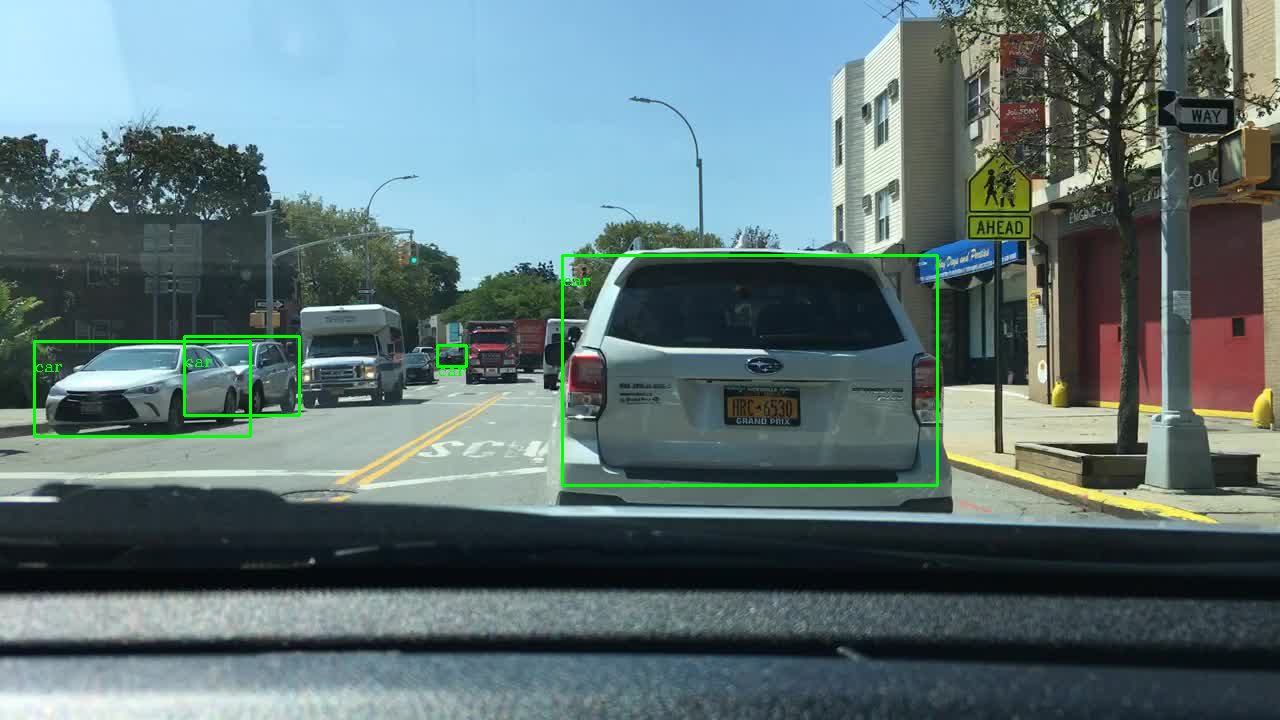

In [ ]:
img = cv2.imread('car1.jpg')
height, width, channels = img.shape

# Detecting objects
# https://docs.opencv.org/master/d6/d0f/group__dnn.html
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

class_ids = []
confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > min_confidence:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, min_confidence, 0.4)

for i in range(len(boxes)):
    if i in indexes:
        if class_ids[i] == 2:
          x, y, w, h = boxes[i]
          label = str(classes[class_ids[i]])
          print(i,class_ids[i], label)
          cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
          cv2.putText(img, label, (x, y + 30), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 255, 0), 1)

cv2_imshow(img)

# 3.Plate

In [ ]:
# 'harcascade_russian_plate_number.xml'
from google.colab import files
files.upload()

In [ ]:
!ls -al

total 516
drwxr-xr-x 1 root root   4096 Oct 14 10:58  .
drwxr-xr-x 1 root root   4096 Oct 14 09:01  ..
-rw-r--r-- 1 root root  77963 Oct 14 09:10  car1.jpg
drwxr-xr-x 4 root root   4096 Oct 12 13:25  .config
drwx------ 5 root root   4096 Oct 14 09:02  drive
-rw-r--r-- 1 root root  75482 Oct 14 10:23  haarcascade_russian_plate_number.xml
-rw-r--r-- 1 root root  10054 Oct 14 10:58  images.jfif
-rw-r--r-- 1 root root   9371 Oct 14 10:56 'russain car2.jfif'
-rw-r--r-- 1 root root 287709 Oct 14 10:54 'russain car.jpg'
-rw-r--r-- 1 root root  30182 Oct 14 10:53 'russian car plate.webp'
drwxr-xr-x 1 root root   4096 Oct 12 13:25  sample_data


In [ ]:
plate_cascade_name = 'haarcascade_russian_plate_number.xml'

In [ ]:
plate_cascade = cv2.CascadeClassifier()
#-- 1. Load the cascades
if not plate_cascade.load(cv2.samples.findFile(plate_cascade_name)):
  print('--(!)Error loading face cascade')
  exit(0)

0 2 car
2 2 car
9 2 car
10 2 car
13 2 car


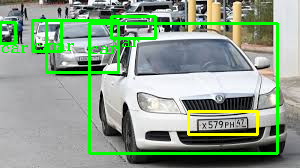

In [ ]:
img = cv2.imread('images.jfif')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)

height, width, channels = img.shape

# Detecting objects
# https://docs.opencv.org/master/d6/d0f/group__dnn.html
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

class_ids = []
confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > min_confidence:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, min_confidence, 0.4)

for i in range(len(boxes)):
    if i in indexes:
        if class_ids[i] == 2:
          x, y, w, h = boxes[i]
          label = str(classes[class_ids[i]])
          print(i,class_ids[i], label)
          cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
          cv2.putText(img, label, (x, y + 30), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 255, 0), 1)
          carROI = gray[y:y+h, x:x+w]
          plates = plate_cascade.detectMultiScale(carROI)
          for (x2, y2, w2, h2) in plates:
            cv2.rectangle(img, (x + x2, y + y2), (x + x2 + w2, y + y2 + h2), (0, 255, 255), 2)


cv2_imshow(img)